In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import search_space
import plotting
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
recepie_generator = search_space.RecepieGenerator()

{'f': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'h_new_0': {'op': 'activation_tanh', 'input': ['f']}}


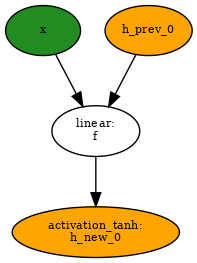

In [6]:
recepie = recepie_generator.get_example_recepie('rnn')
print(recepie)
plotting.plot_recepie(recepie, dpi=100)

In [7]:
#with open("data/figures/rnn_cell.png", "wb") as png:
#    png.write(fig.data)

In [ ]:
#fig

{'i': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'i_act': {'op': 'activation_tanh', 'input': ['i']}, 'j': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'j_act': {'op': 'activation_sigm', 'input': ['j']}, 'f': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'f_act': {'op': 'activation_sigm', 'input': ['f']}, 'o': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'o_act': {'op': 'activation_tanh', 'input': ['o']}, 'h_new_1_part1': {'op': 'elementwise_prod', 'input': ['f_act', 'h_prev_1']}, 'h_new_1_part2': {'op': 'elementwise_prod', 'input': ['i_act', 'j_act']}, 'h_new_1': {'op': 'elementwise_sum', 'input': ['h_new_1_part1', 'h_new_1_part2']}, 'h_new_1_act': {'op': 'activation_tanh', 'input': ['h_new_1']}, 'h_new_0': {'op': 'elementwise_prod', 'input': ['h_new_1_act', 'o_act']}}


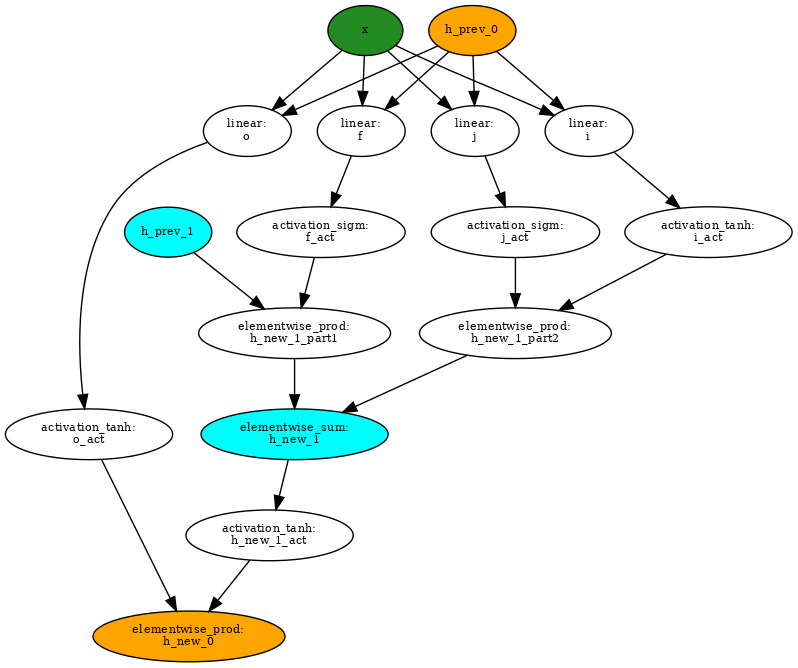

In [8]:
recepie = recepie_generator.get_example_recepie('lstm')
print(recepie)
plotting.plot_recepie(recepie, dpi=100)

In [ ]:
#with open("data/figures/lstm_cell.png", "wb") as png:
#    png.write(fig.data)

In [ ]:
#fig

{'r': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'r_act': {'op': 'activation_sigm', 'input': ['r']}, 'z': {'op': 'linear', 'input': ['x', 'h_prev_0']}, 'z_act': {'op': 'activation_sigm', 'input': ['z']}, 'rh': {'op': 'elementwise_prod', 'input': ['r_act', 'h_prev_0']}, 'h_tilde': {'op': 'linear', 'input': ['x', 'rh']}, 'h_tilde_act': {'op': 'activation_tanh', 'input': ['h_tilde']}, 'h_new_0': {'op': 'blend', 'input': ['z_act', 'h_prev_0', 'h_tilde_act']}}


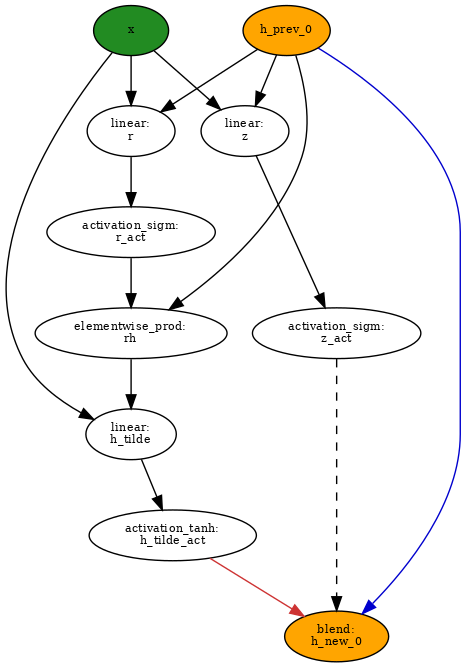

In [10]:
recepie = recepie_generator.get_example_recepie('gru')
print(recepie)
plotting.plot_recepie(recepie, dpi=100)

In [11]:
#with open("data/figures/gru_cell.png", "wb") as png:
#    png.write(fig.data)

In [12]:
#fig

valid recepie:  False


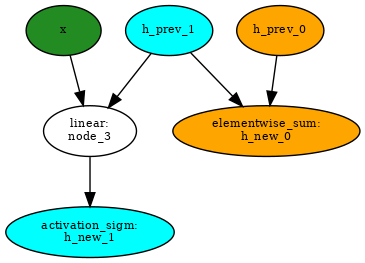

In [13]:
recepie, sanity_check = recepie_generator.generate_random_recepie(4)
print('valid recepie: ', sanity_check)
plotting.plot_recepie(recepie)

valid recepie:  True


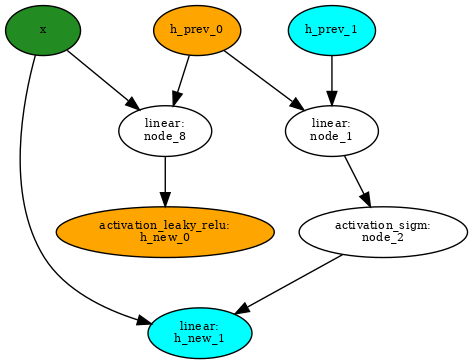

In [14]:
recepie, sanity_check = recepie_generator.generate_random_recepie(10)
print('valid recepie: ', sanity_check)
plotting.plot_recepie(recepie)

# Make search space elements example

In [1]:
from tqdm import tqdm_notebook

In [3]:
max_valid_confs = 100
all_recepies = []
rnd_offset = 0
for hidden_tuple_size in [1, 2, 3]:
    for intermediate_elements in [7, 14, 21]:
        recepie_generator = search_space.RecepieGenerator(hidden_tuple_size, intermediate_elements)
        N = 200
        valid_seeds = []
        for i in tqdm_notebook(range(N)):
            recepie, sanity_check = recepie_generator.generate_random_recepie(i + rnd_offset)
            #print(recepie)
            if sanity_check:
                valid_seeds.append(i)
        for i in valid_seeds[:max_valid_confs]:
            recepie, sanity_check = recepie_generator.generate_random_recepie(i + rnd_offset)
            #print(recepie)
            all_recepies.append(recepie)
        rnd_offset += N

In [4]:
json_recepies = [json.dumps(x) for x in all_recepies]

mind about duplicates that can appear during generation

In [5]:
len(json_recepies)

504

In [6]:
len(set(json_recepies))

465

['x', 'h_prev_0', 'h_prev_1']
recepie redundant graph
{'node_0': {'op': 'elementwise_prod', 'input': array(['h_prev_1', 'h_prev_0'], dtype='<U8')}, 'node_1': {'op': 'elementwise_sum', 'input': array(['h_prev_1', 'h_prev_0'], dtype='<U8')}, 'node_2': {'op': 'blend', 'input': array(['node_0', 'h_prev_0', 'node_1'], dtype='<U8')}, 'node_3': {'op': 'linear', 'input': array(['h_prev_1', 'h_prev_0'], dtype='<U8')}, 'node_4': {'op': 'activation_tanh', 'input': ['node_3']}, 'node_5': {'op': 'blend', 'input': array(['node_0', 'h_prev_0', 'h_prev_1'], dtype='<U8')}, 'node_6': {'op': 'linear', 'input': array(['h_prev_0', 'h_prev_1'], dtype='<U8')}, 'node_7': {'op': 'activation_sigm', 'input': ['node_6']}, 'node_8': {'op': 'elementwise_prod', 'input': array(['h_prev_0', 'node_0'], dtype='<U8')}, 'node_9': {'op': 'blend', 'input': array(['node_1', 'node_5', 'node_0'], dtype='<U8')}, 'node_10': {'op': 'blend', 'input': array(['node_0', 'node_3', 'h_prev_1'], dtype='<U8')}, 'node_11': {'op': 'linear'

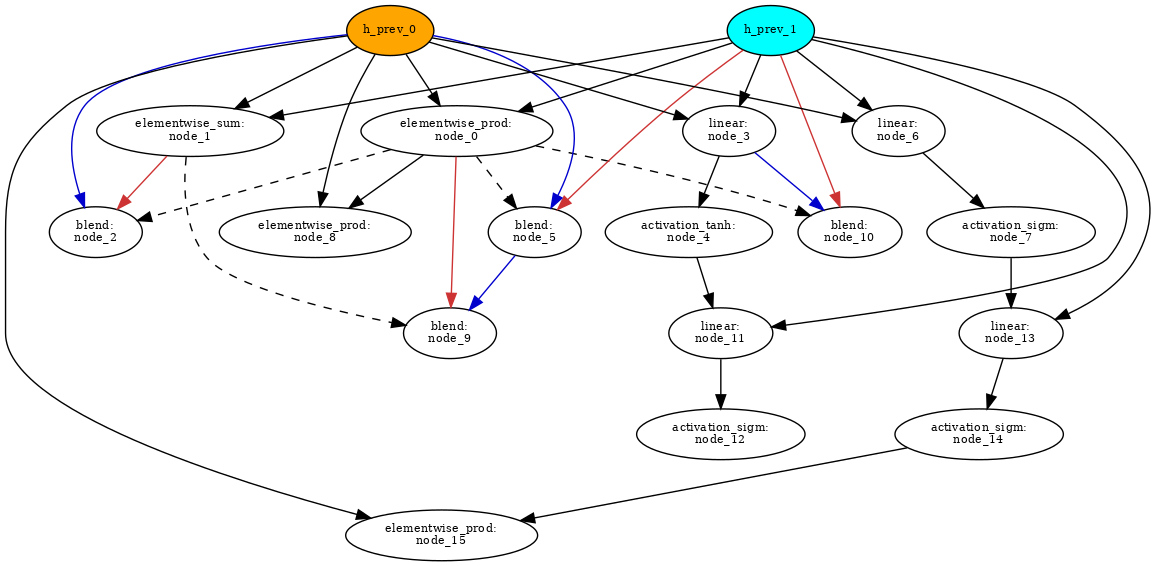

In [25]:
#for hidden_tuple_size in [1, 2, 3]:
#    for intermediate_elements in [7, 14, 21]:
hidden_tuple_size = 2
intermediate_elements = 14
i = 1
rnd_offset = 200
recepie_generator = search_space.RecepieGenerator(hidden_tuple_size, intermediate_elements)
#recepie, sanity_check = recepie_generator.generate_random_recepie(i + rnd_offset)

# get hidden nodes
prev_hidden_nodes = [f'h_prev_{i}' for i in range(recepie_generator.hidden_tuple_size)]
# get the input involved
base_nodes = ['x'] + prev_hidden_nodes
print(base_nodes)
recepie = {}
recepie_generator._generate_redundant_graph(recepie, base_nodes)
print("===========")
print("recepie redundant graph")
print(recepie)
plotting.plot_recepie(recepie)

create hidden nodes
{'node_0': {'op': 'elementwise_prod', 'input': ['h_prev_1', 'h_prev_0']}, 'node_1': {'op': 'elementwise_sum', 'input': ['h_prev_1', 'h_prev_0']}, 'node_2': {'op': 'blend', 'input': ['node_0', 'h_prev_0', 'node_1']}, 'node_3': {'op': 'linear', 'input': ['h_prev_1', 'h_prev_0']}, 'node_4': {'op': 'activation_tanh', 'input': ['node_3']}, 'node_6': {'op': 'linear', 'input': ['h_prev_0', 'h_prev_1']}, 'node_8': {'op': 'elementwise_prod', 'input': ['h_prev_0', 'node_0']}, 'node_9': {'op': 'blend', 'input': ['node_1', 'h_new_0', 'node_0']}, 'node_10': {'op': 'blend', 'input': ['node_0', 'node_3', 'h_prev_1']}, 'node_11': {'op': 'linear', 'input': ['h_prev_1', 'node_4']}, 'node_12': {'op': 'activation_sigm', 'input': ['node_11']}, 'node_13': {'op': 'linear', 'input': ['h_new_1', 'h_prev_1']}, 'node_14': {'op': 'activation_sigm', 'input': ['node_13']}, 'node_15': {'op': 'elementwise_prod', 'input': ['node_14', 'h_prev_0']}, 'h_new_0': {'op': 'blend', 'input': ['node_0', 'h_p

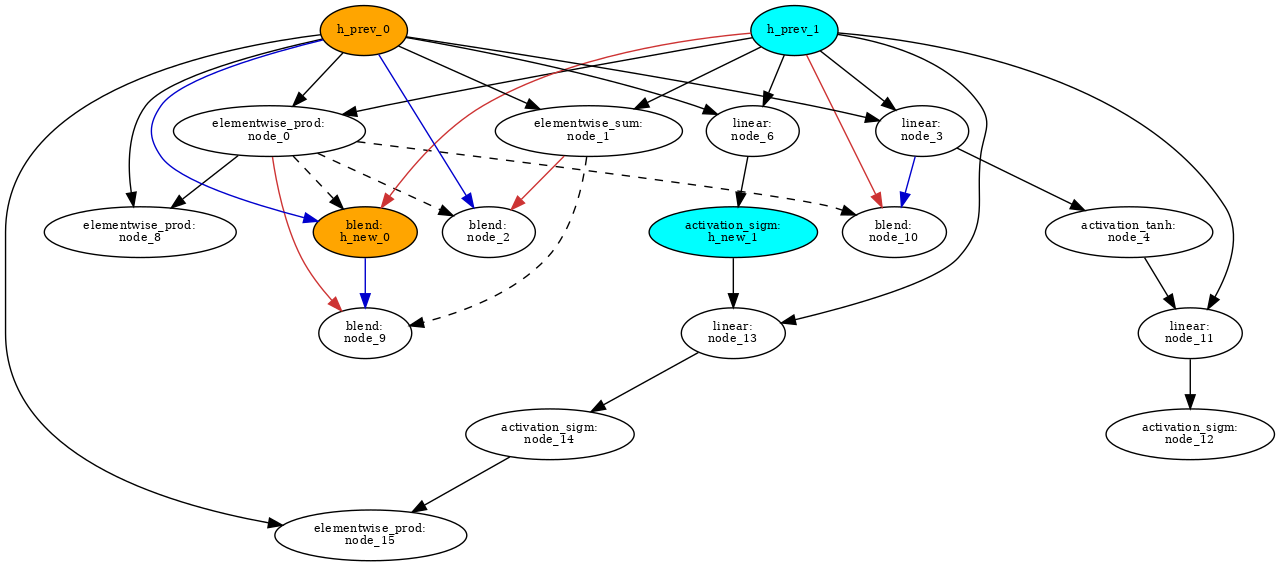

In [26]:
recepie_generator._create_hidden_nodes(recepie)
print("===========")
print("create hidden nodes")
print(recepie)
plotting.plot_recepie(recepie)


remove redundant nodes
{'node_0': {'op': 'elementwise_prod', 'input': ['h_prev_1', 'h_prev_0']}, 'node_6': {'op': 'linear', 'input': ['h_prev_0', 'h_prev_1']}, 'h_new_0': {'op': 'blend', 'input': ['node_0', 'h_prev_0', 'h_prev_1']}, 'h_new_1': {'op': 'activation_sigm', 'input': ['node_6']}}


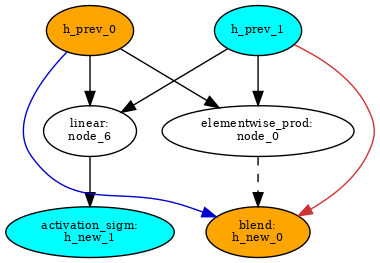

In [28]:
visited = recepie_generator._remove_redundant_nodes(recepie)
print("===========")
print("remove redundant nodes")
print(recepie)
plotting.plot_recepie(recepie)


In [29]:
print("===========")
print("visited")

visited
